In [1]:
import csv
import datetime
from statistics import mean
from sklearn.model_selection import cross_val_score, KFold
from IPython.display import display
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential, utils
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay,classification_report, accuracy_score, plot_confusion_matrix, accuracy_score
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, Conv1D, MaxPooling1D, MaxPooling2D,MaxPooling3D,BatchNormalization, MaxPool2D
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
class Read:
    def __init__(self,filename):
        self.reader = csv.reader(open(filename), delimiter = ",")
        self.data = list(self.reader)
        self.data.pop(0)

In [3]:
class Game:
    id = 0
    def __init__(self,data):
        Game.id += 1
        self.id = Game.id
        self.data = data
        index = 0
        for i in range(len(self.data)):
            try:
                self.data[i] = int(self.data[i])
            except:
                pass
        self.game_data = self.data[1:22]
        self.pregame_data = self.data[1:4]
        self.date = self.data[1]
        self.time = self.data[2]
        self.h_team = self.data[3]
        self.a_team = self.data[4]
        self.h_score = self.data[5]  
        self.a_score = self.data[6]
        if self.data[7] == "H":
            self.result = 0
        elif self.data[7] == "D":
            self.result = 1
        elif self.data[7] == "A":
            self.result = 2
        else:
            print("error")
        self.h_half_goals = self.data[8] #goals at half time
        self.a_half_goals = self.data[9] 
        self.half_result = self.data[10] 
        self.referee = self.data[11]
        self.h_shots = self.data[12]
        self.a_shots = self.data[13]
        self.h_shots_ontarg = self.data[14]
        self.a_shots_ontarg = self.data[15]
        self.h_fouls = self.data[16]
        self.a_fouls = self.data[17]
        self.h_corners = self.data[18]
        self.a_corners = self.data[19]
        self.h_yellow = self.data[20]
        self.a_yellow = self.data[21]
        self.h_red = self.data[22]
        self.a_red = self.data[23]

In [4]:
class Team:
    id = 0
    def __init__(self, name):
        Team.id += 1
        self.id = Team.id 
        self.name = name
        self.games = []
    
    def add_game(self,game):
        self.games.append(game)

    def get_id(self):
        return self.id
        
    def get_name(self):
        return self.name
    
    def get_games_before(self,game):
        games_before = []
        count = 0
        for i in self.games:
            if i == game:
                return self.games[:count]
            count+=1
        return []
    
    def get_stats(self,game_list):
        #stats avg([goals_scored,conceded,halfgoals,halfconceded,shots,
        #shotsgiven,shotson,shotsongiven,foulsgiven,fouls,corners,
        #cornersgiven,yellowgiven,yellow,redgiven,red])
        stats = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        game_count = 0
        for i in game_list:
            if (i.h_team == self.name):
                game_count += 1
                stats[0] += i.h_score
                stats[1] += i.a_score
                stats[2] += i.h_half_goals
                stats[3] += i.a_half_goals
                stats[4] += i.h_shots
                stats[5] += i.a_shots
                stats[6] += i.h_shots_ontarg
                stats[7] += i.a_shots_ontarg
                stats[8] += i.h_fouls
                stats[9] += i.a_fouls
                stats[10] += i.h_corners
                stats[11] += i.a_corners
                stats[12] += i.h_yellow
                stats[13] += i.a_yellow
                stats[14] += i.h_red
                stats[15] += i.a_red
                
            if (i.a_team == self.name):
                game_count += 1
                stats[0] += i.a_score
                stats[1] += i.h_score
                stats[2] += i.a_half_goals
                stats[3] += i.h_half_goals
                stats[4] += i.a_shots
                stats[5] += i.h_shots
                stats[6] += i.a_shots_ontarg
                stats[7] += i.h_shots_ontarg
                stats[8] += i.a_fouls
                stats[9] += i.h_fouls
                stats[10] += i.a_corners
                stats[11] += i.h_corners
                stats[12] += i.a_yellow
                stats[13] += i.h_yellow
                stats[14] += i.a_red
                stats[15] += i.h_red
        count = 0
        for j in range(len(stats)):
            count += 1
            if game_count !=0:
                stats[j] = round(stats[j]/game_count,2) * 100 * (count*count)/len(stats)
        return stats
  
    def get_stats_before(self,game):
        game_list = self.get_games_before(game)
        game_list
        stats = self.get_stats(game_list)
        return stats

In [5]:
read = Read("Data/19_20_data.csv")

games = list()
teams = list()
data = []
index = 0
labels = []

for result in read.data:
    games.append(Game(result))
    found = False
    for i in teams:
        if i.get_name() == result[3]:
            found = True
            break
    if (found == False):
        teams.append(Team(result[3]))
    found = False
    
for team in teams:
    for game in games:
        if game.h_team == team.name or game.a_team == team.name:
            team.add_game(game)

for game in games:
    data.append([[],[]])
    res = np.array(game.result)
    labels.append(res)
    for team in teams:
        if game.h_team == team.name:
            for i in team.get_stats_before(game):
                data[index][0].append(i)
            data[index][0].append(team.id)
        elif game.a_team == team.name:
            for i in team.get_stats_before(game):
                data[index][1].append(i)
            data[index][1].append(team.id)
    index+=1
    
np_labels = np.array(labels)
np_data = np.array(data)

In [6]:
def build_model(data,labels):
    model = Sequential()

    model.add(Conv1D(32, (2), activation='relu', input_shape=train_data[0].shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D((1)))
    model.add(Dropout(0.4))

    model.add(Conv1D(64, (1), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D((1)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer='adam',
                  loss="sparse_categorical_crossentropy",
                  metrics = "accuracy")
    
    model_history = model.fit(data, labels, epochs=50)
    
    return(model)
    

In [7]:
def evaluate_model(model,data,labels):
    model.evaluate(data,labels)
    model_pred = model.predict_classes(data)
    model_matrix = confusion_matrix(labels, model_pred)
    model_show = ConfusionMatrixDisplay(confusion_matrix = model_matrix)
    model_show = model_show.plot()
    m = tf.keras.metrics.Accuracy()
    m.update_state(labels, model_pred)
    return(m.result().numpy())

fold 1:
Epoch 1/50
10/10 [==============================] - 6s 10ms/step - loss: 1.4590 - accuracy: 0.3938
Epoch 2/50
10/10 [==============================] - 0s 16ms/step - loss: 1.5877 - accuracy: 0.4053
Epoch 3/50
10/10 [==============================] - 0s 11ms/step - loss: 1.5775 - accuracy: 0.3731
Epoch 4/50
10/10 [==============================] - 0s 11ms/step - loss: 1.4682 - accuracy: 0.3552
Epoch 5/50
10/10 [==============================] - 0s 11ms/step - loss: 1.2995 - accuracy: 0.4583
Epoch 6/50
10/10 [==============================] - 0s 9ms/step - loss: 1.4032 - accuracy: 0.4049
Epoch 7/50
10/10 [==============================] - 0s 18ms/step - loss: 1.3287 - accuracy: 0.4534
Epoch 8/50
10/10 [==============================] - 0s 8ms/step - loss: 1.3008 - accuracy: 0.3989
Epoch 9/50
10/10 [==============================] - 0s 13ms/step - loss: 1.3137 - accuracy: 0.4090
Epoch 10/50
10/10 [==============================] - 0s 9ms/step - loss: 1.1922 - accuracy: 0.4650
Epoc

C:\Users\Sam\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


fold 2:
Epoch 1/50
10/10 [==============================] - 5s 7ms/step - loss: 1.5647 - accuracy: 0.3947
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 1.6529 - accuracy: 0.3705
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 1.6723 - accuracy: 0.3778
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 1.5463 - accuracy: 0.4078
Epoch 5/50
10/10 [==============================] - 0s 8ms/step - loss: 1.5281 - accuracy: 0.3764
Epoch 6/50
10/10 [==============================] - ETA: 0s - loss: 1.3060 - accuracy: 0.43 - 0s 7ms/step - loss: 1.3208 - accuracy: 0.4329
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 1.4576 - accuracy: 0.3975
Epoch 8/50
10/10 [==============================] - 0s 8ms/step - loss: 1.3655 - accuracy: 0.4209
Epoch 9/50
10/10 [==============================] - 0s 8ms/step - loss: 1.2958 - accuracy: 0.4747
Epoch 10/50
10/10 [==============================] - 0s 7ms/step - l

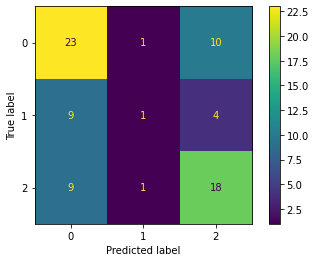

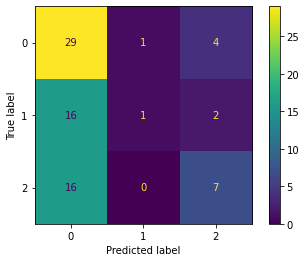

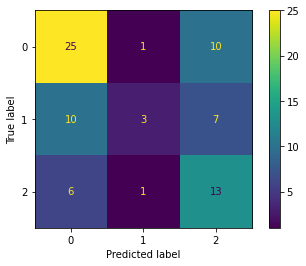

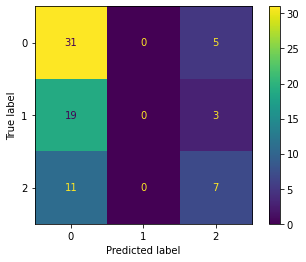

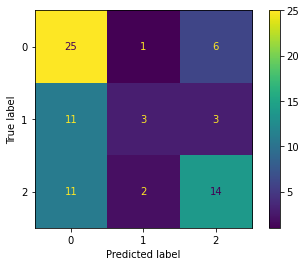

In [8]:
train_data, test_data, train_labels, test_labels = train_test_split(np_data, np_labels, test_size = 0.2)

kf = KFold(5,shuffle=True,random_state=1)
fold = 0
accuracies = []
for train_index, test_index in kf.split(np_data):
    fold+=1
    print("fold " + str(fold)+ ":")
    train_data, test_data = np_data[train_index], np_data[test_index]
    train_labels, test_labels = np_labels[train_index], np_labels[test_index]
    model = build_model(train_data,train_labels)
    accuracies.append(evaluate_model(model,test_data,test_labels))
print("accuracies: "+ str(accuracies))
print("average: "+ str(mean(accuracies)))